# **Laboratorio 6:** Operadores y Algoritmos Morfológicos
**Programa:** [Bootcamp en Visión Artificial para los ODS](https://github.com/EdwinTSalcedo/Bootcamp-Computer-Vision-for-the-SDGs) - **Autor:** [Edwin Salcedo](https://github.com/EdwinTSalcedo)


Los operadores morfológicos se utilizan para manipular la forma de las imágenes. Por lo general, se implementan en imágenes binarias, las cuales son útiles para la recopilación de bordes o tareas de segmentación de imágenes.También es posible aplicarlos en imágenes en escala de grises, pero esto es menos común. Este laboratorio te ayudará a implementar estos operadores con casos muy prácticos.

<img src="https://media.giphy.com/media/26n6zAzxlfKsAT5N6/giphy.gif" width="200" height="200" align="center" />

Registra los datos de tu equipo en esta sección al finalizar el laboratorio. 

**Nombre de equipo:**

**Miembros de equipo:**
- << nombre >> << apellido >> (Contribución sobre el 25%)
- << nombre >> << apellido >> (Contribución sobre el 25%)
- << nombre >> << apellido >> (Contribución sobre el 25%)
- << nombre >> << apellido >> (Contribución sobre el 25%) 

## 1. Abrir imágenes desde Internet, importar librerías y generar imágenes binarias

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


(630, 945)
uint8
(630, 945)
uint8


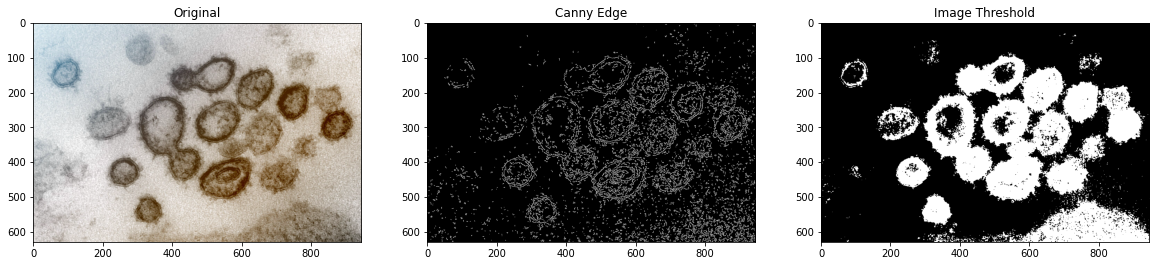

In [ ]:
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import os, requests
import numpy as np

# Descargar una imagen de microscopio de Internet que contenga una muestra del virus COVID-19 
img_data = requests.get("https://news.harvard.edu/wp-content/uploads/2020/03/Coronavirus-Image-1-945x630.jpg" , verify=False).content
with open('Coronavirus-Image-1-945x630.jpg', 'wb') as handler:
    handler.write(img_data)

# Importar imagen
image = cv2.imread('Coronavirus-Image-1-945x630.jpg')

# Convertir la imagen a escala de grises 
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Implementar Canny Edge Detection
canny = cv2.Canny(grayscale, 150, 200)

# Implementar binarización
ret, thresh = cv2.threshold(grayscale,150,200,cv2.THRESH_BINARY_INV)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Original')
ax1.imshow(image, cmap='gray')

ax2.set_title('Canny Edge')
ax2.imshow(canny, cmap='gray')

ax3.set_title('Image Thresholded')
ax3.imshow(thresh, cmap='gray')

print(canny.shape)
print(canny.dtype)

print(thresh.shape)
print(thresh.dtype)

## 2. Traslado

#### **Método 1: OpenCV**
Hay dos formas principales para implementar traslación de imágenes. El primero requiere definir una matriz de traslación denominada M:

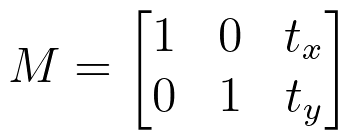



Donde $t_{x}$ indica el número de píxeles que la imagen se trasladara horizontalmente y $t_{y}$ el número de píxeles de traslado vertical. Ambas variables pueden tener valores negativos también, donde los negativos significan una traslación hacia la izquierda y hacia arriba, respectivamente.


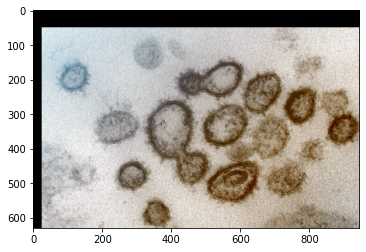

In [ ]:
copy = np.copy(image)

# Definir la matriz M
M = np.float32([[1, 0, 25], 
                [0, 1, 50]])
# Esta matriz define desplazar la imagen 25 píxeles a la derecha y 50 píxeles hacia abajo

# El último parámetro es el tamaño de la imagen.
translated = cv2.warpAffine(copy, M, (copy.shape[1], copy.shape[0]))
plt.imshow(translated, cmap="gray")

#### **Método 2: Imutils**

Por otro lado, la traslación también esta presente en otras librerías externas. Una de las mas conocidas es `Imutils`. Esta librería cuenta con diferentes funciones de procesamiento de imágenes, como por ejemplo traslación, rotación, cambio de tamaño, y esqueletización.

En el caso de la traslación, la librería permite simplemente hacer una llamada a la función en lugar de construir manualmente la matriz de traducción M y llamar a `cv2.warpAffine`.

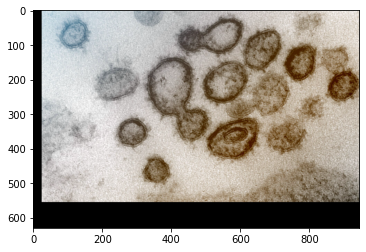

In [ ]:
import imutils

# Desplazar la imagen horizontalmente (x=25 píxeles a la derecha) y verticalmente (y=75 píxeles hacia arriba)
translated = imutils.translate(copy, 25, -75)
plt.imshow(translated, cmap="gray")

## 3. Escalado

**Método 1: OpenCV**

El escalado resulta útil en muchas aplicaciones de procesamiento de imágenes y de aprendizaje automático. Por ejemplo, reducir imágenes de 1500x1500 a 394x394 puede reducir el tiempo de entrenamiento de una red neuronal, sin afectar la presición. 

Al implementar OpenCV, es bueno considerar los componentes de la matriz M con la siguiente disposición:
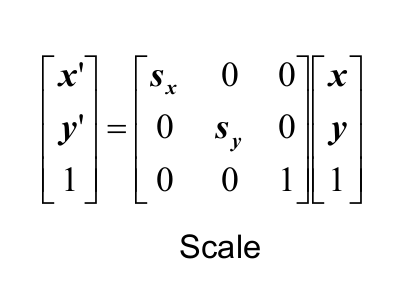

Donde $S_{x}$ y $S_{y}$ son los factores de escala para el eje x y el eje y, respectivamente.


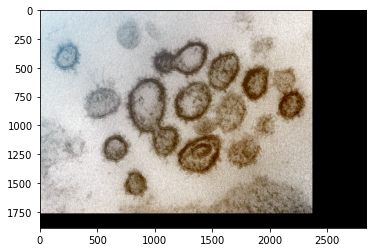

In [ ]:
copy2 = np.copy(image)

# Obtener la forma de la imagen
rows, cols, dim = copy2.shape

# Matriz de transformación para escalar la imagen
M = np.float32([[2.5, 0  , 0],
            	[0,   2.8, 0],
            	[0,   0,   1]])

# Aplicar una transformación de perspectiva a la imagen.
scaled_img = cv2.warpPerspective(copy2,M,(cols*3,rows*3))

# Mostrar la imagen resultante
plt.imshow(scaled_img)
plt.show(cv2.resize)

#### **Método 2: OpenCV**

OpenCV también proporciona el método `cv2.resize()` para cambiar el tamaño de una imagen. Más grande se redimensiona teniendo en cuenta el número objetivo de píxeles. Finalmente, se redimensiona Stretch_near considerando también un parámetro de interpolación, que establece cómo se deben formar los nuevos píxeles.

Read the docs for more info about interpolation: https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html 

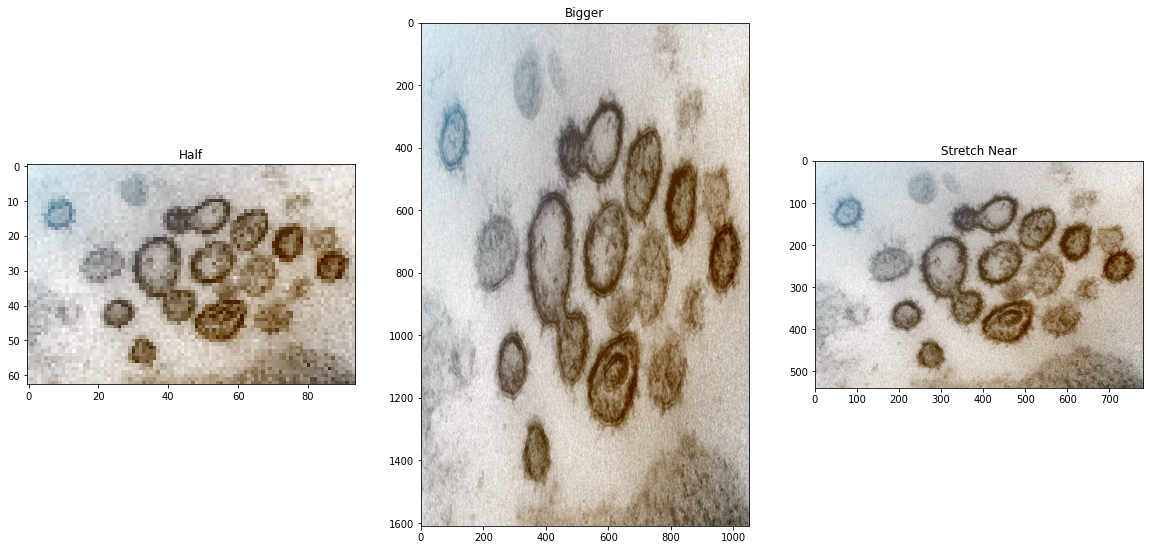

In [ ]:
# Considerar un factor de escala para los ejes 'x' y 'y'
# 0.1 reduce el tamaño de ambas dimensiones a un 10% del tamaño original
half = cv2.resize(copy2, (0, 0), fx = 0.1, fy = 0.1)

# Redimensionar en base a un tamaño fijo
bigger = cv2.resize(copy2, (1050, 1610))

# Redimensionar considerando un factor de interpolación
stretch_near = cv2.resize(copy2, (780, 540),
               interpolation = cv2.INTER_NEAREST)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Half')
ax1.imshow(half, cmap='gray')

ax2.set_title('Bigger')
ax2.imshow(bigger, cmap='gray')

ax3.set_title('Stretch Near')
ax3.imshow(stretch_near, cmap='gray')

#### **Método 3: Imutils**

Finalmente, la función de cambio de tamaño de `imutils` mantiene la relación de aspecto y proporciona los argumentos de palabra clave `width` y `height` para que la imagen pueda cambiar el tamaño del ancho/alto deseado mientras se mantiene la relación de aspecto, por lo que no tienen que ser calculados explícitamente por el ti.

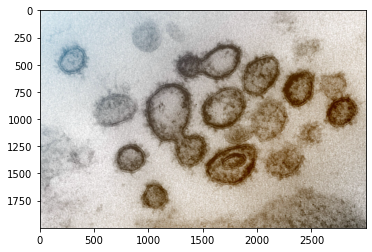

In [ ]:
# Cambiar el tamaño de la imagen y mostrarla
resized = imutils.resize(copy2, width=3000)
plt.imshow(resized)

## 4. Reflexión 

#### **Método 1: OpenCV**

El reflejo de la imagen (o reflejo) es útil para voltear una imagen, puede voltear la imagen verticalmente u horizontalmente. Para la reflexión a lo largo del eje x, establecemos el valor de $S_{y}$ como -1 y $S_{x}$ como 1 y viceversa para la reflexión en el eje y. Es importante observar cómo se puede insertar valores de columnas y filas en la matriz M cuando es necesario.

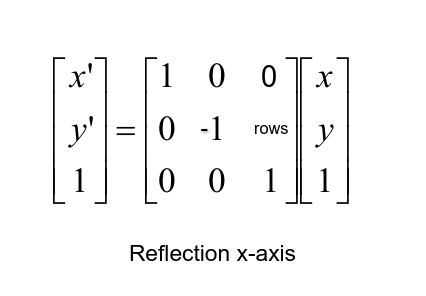

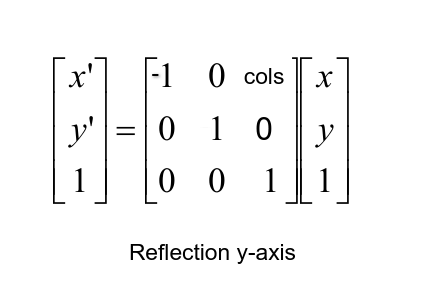



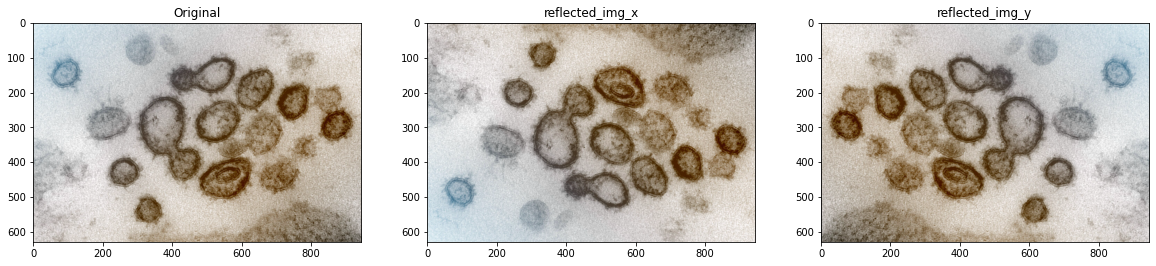

In [ ]:
# Copiar la imagen binaria base
copy3 = np.copy(image)

# Conseguir la forma de la imagén
rows, cols, dim = copy3.shape
# Definir la matriz de transformación para la reflexión en el eje X
M_x = np.float32([[1,  0, 0   ],
                [0, -1, rows],
                [0,  0, 1   ]])
# Definir la matriz de transformación para la reflexión en el eje Y
M_y = np.float32([[-1, 0, cols],
                [ 0, 1, 0   ],
                [ 0, 0, 1   ]])
# Aplicar una transformación de perspectiva, tomando en cuenta el eje X
reflected_img_x = cv2.warpPerspective(copy3,M_x,(int(cols),int(rows)))

# Aplicar una transformación de perspectiva, tomando en cuenta el eje Y
reflected_img_y = cv2.warpPerspective(copy3,M_y,(int(cols),int(rows)))

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Original')
ax1.imshow(copy3, cmap='gray')

ax2.set_title('reflected_img_x')
ax2.imshow(reflected_img_x, cmap='gray')

ax3.set_title('reflected_img_y')
ax3.imshow(reflected_img_y, cmap='gray')

## 5. Dilatación
La dilatación amplía las áreas blancas (con valor 1 en las imagenes binarias) de una imagen al agregar píxeles a los límites percibidos de los objetos en esa imagen.

Para dilatar una imagen en OpenCV, puedes usar la función `dilate`. Esta función requiere tres entradas:
- una imagen binaria 
- un elemento estructurante que determina el tamaño de la dilatación
- un número de iteraciones para realizar la dilatación (típicamente = 1).

En el siguiente ejemplo, tenemos un elemento estructurante de 5x5, que se mueve sobre una imagen, como un filtro, y convierte un píxel en blanco si alguno de los píxeles que lo rodean es blanco en una ventana de 5x5. 

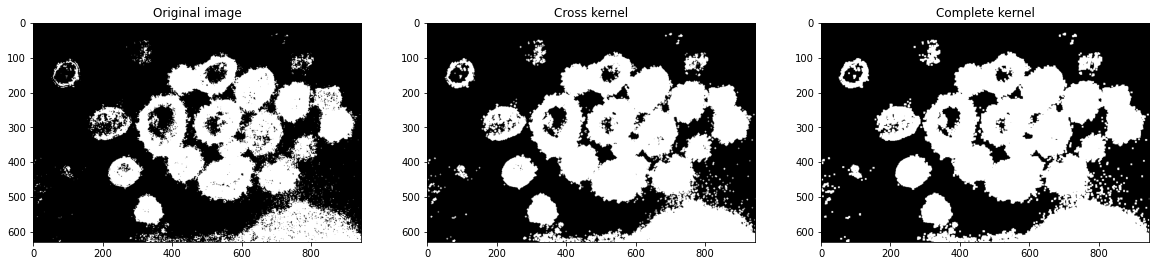

In [ ]:
# Copiar la imagen binaria base
copy3 = np.copy(thresh)

# Crear dos elementos estructurantes de 5x5
s_1 = np.uint8([[0, 0, 1, 0, 0],
                    [0, 0, 1, 0, 0],
                    [1, 1, 1, 1, 1],
                    [0, 0, 1, 0, 0], 
                   [0, 0, 1, 0, 0], 
                    ])

s_2 = np.ones((5,5),np.uint8)

# Dilatar la imagen con el elemento estructurante s_1
dilation = cv2.dilate(copy3, s_1, iterations = 1)

# Dilatar la imagen con el elemento estructurante s_2
dilation2 = cv2.dilate(copy3, s_2, iterations = 1)

# Mostrar resultados
f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(20,10))

ax0.set_title('Original image')
ax0.imshow(copy3, cmap='gray')

ax1.set_title('Cross kernel')
ax1.imshow(dilation, cmap='gray')

ax2.set_title('Complete kernel')
ax2.imshow(dilation2, cmap='gray')

## 6. Erosión

La erosión hace lo contrario: elimina píxeles a lo largo de los límites de los objetos y reduce el tamaño de los objetos con pixeles positivos.


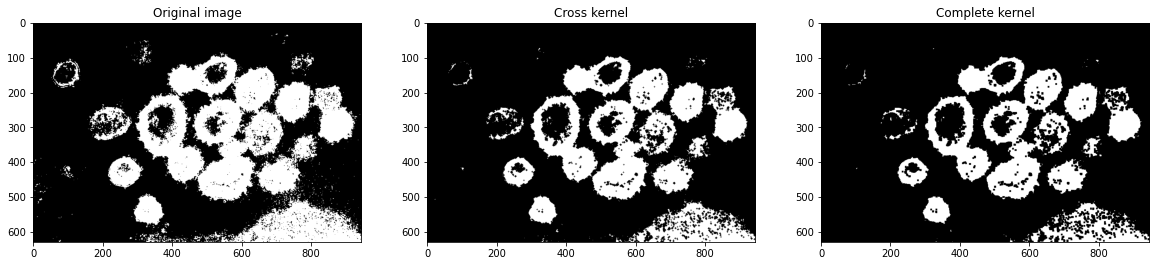

In [ ]:
# Copiar la imagen binaria base
copy4 = np.copy(thresh)

# Erosionar la imagen con el elemento estructurante s_1
erode = cv2.erode(copy4, s_1, iterations = 1)

# Erosionar la imagen con el elemento estructurante s_2
erode2 = cv2.erode(copy4, s_2, iterations = 1)

# Mostrar resultados
f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(20,10))
ax0.set_title('Original image')
ax0.imshow(copy4, cmap='gray')

ax1.set_title('Cross kernel')
ax1.imshow(erode, cmap='gray')

ax2.set_title('Complete kernel')
ax2.imshow(erode2, cmap='gray')

## 7. Apertura y Cierre

Las dos últimas operaciones (erosión y dilatación) a menudo se combinan para obtener mejores resultados. Una de esas combinaciones se llama **apertura**, que es erosión seguida por una dilatación. Esto es útil para la reducción de ruido en la que la erosión primero elimina el ruido (y encoge los objetos en la imagen) y luego la dilatación vuelve a agrandar estos objetos.

Para implementar esto en OpenCV, usamos la función `morphologyEx`, la operación que queremos realizar y nuestro elemento estructurante.

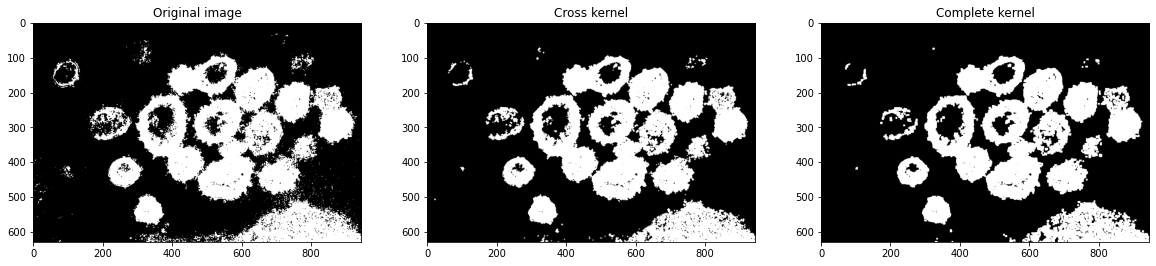

In [ ]:
# Copiar la imagen binaria base
copy5 = np.copy(thresh)

# Apertura de la imagen con el elemento estructurante s_1
opening = cv2.morphologyEx(copy5, cv2.MORPH_OPEN, s_1, iterations=1)

# Apertura de la imagen con el elemento estructurante s_2
opening2 = cv2.morphologyEx(copy5, cv2.MORPH_OPEN, s_2, iterations=1)

# Mostrar los resultados
f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(20,10))
ax0.set_title('Original image')
ax0.imshow(copy5, cmap='gray')

ax1.set_title('Cross kernel')
ax1.imshow(opening, cmap='gray')

ax2.set_title('Complete kernel')
ax2.imshow(opening2, cmap='gray')

El **cierre** es la combinación inversa de la apertura; es la dilatación seguida de la erosión, la cual es útil para cerrar pequeños agujeros o áreas oscuras dentro de un objeto.

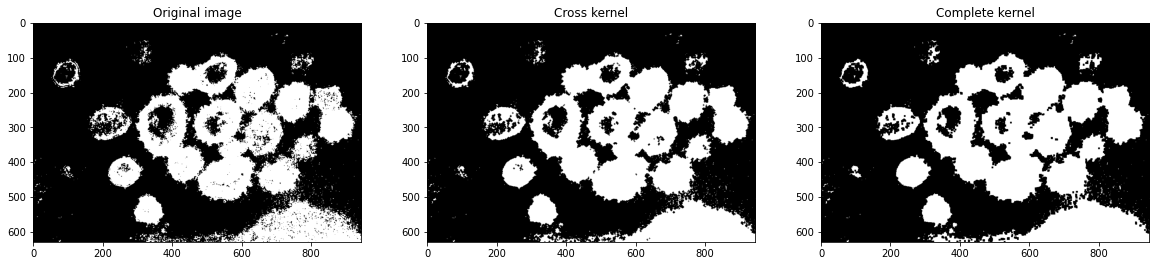

In [ ]:
# Copiar una imagen binaria base
copy6 = np.copy(thresh)

# Aplicar cierre con el elemento estructurante s_1
closing = cv2.morphologyEx(copy6, cv2.MORPH_CLOSE, s_1, iterations=1)

# Aplicar cierre una el elemento estructurante s_2
closing2 = cv2.morphologyEx(copy6, cv2.MORPH_CLOSE, s_2, iterations=1)

# Mostrar los resultados
f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(20,10))
ax0.set_title('Original image')
ax0.imshow(copy6, cmap='gray')

ax1.set_title('Cross kernel')
ax1.imshow(closing, cmap='gray')

ax2.set_title('Complete kernel')
ax2.imshow(closing2, cmap='gray')

## 8. Algoritmo Morfologico de Detección de Bordes

Este es el primer algoritmo que veras en este laboratorio. Los algoritmos morfológicos consisten en una secuencia de operadores morfológicos que tienen una finalidad especifica. La detección de bordes se puede hacer mediante la obtención de la diferencia entre dilatación y erosión de una imagen. El resultado se verá como el contorno del objeto.

Por otra parte, OpenCV también brinda el parametro MORPH_GRADIENT, que atraves de la función morphologyEx, encuentra posibles bordes de una imagen. 

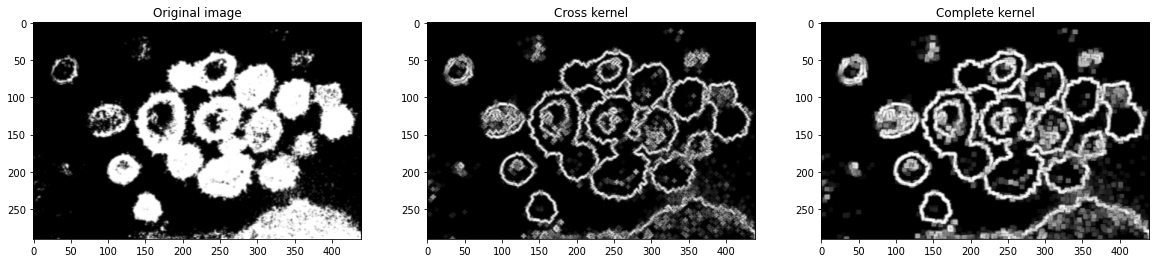

In [ ]:
# Copiar nuevamente la imagen binaria
copy7 = np.copy(image)

# Opening para la imagen
gradient = cv2.morphologyEx(copy7, cv2.MORPH_GRADIENT, s_1) 

gradient2 = cv2.morphologyEx(copy7, cv2.MORPH_GRADIENT, s_2) 

# Mostrar los resultados
f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(20,10))
ax0.set_title('Original image')
ax0.imshow(copy7, cmap='gray')

ax1.set_title('Cross kernel')
ax1.imshow(gradient, cmap='gray')

ax2.set_title('Complete kernel')
ax2.imshow(gradient2, cmap='gray')

## **Ejercicio 1:** La contaminación del agua
El agua suele estar formada por pequeñas partículas contaminantes y algunas bacterias. Sin embargo, la presencia de grandes cantidades de ciertos tipos de bacterias debe encender las alarmas. Por ejemplo, la presencia de bacterias coliformes  en el agua potable, específicamente **E. coli**, sugiere que esta puede contener patógenos que podrían causar diarrea, vómitos, calambres, náuseas, dolores de cabeza, fiebre o fatiga.

Dado que para clasificar y detectar bacterias peligrosas y partículas dañinas generalmente se necesita un equipo de análisis especializado y adecuado, este tipo de trabajo de campo se ha vuelto costoso y, a veces, no está disponible en áreas remotas. Por lo tanto, deberá implementar una forma de contar y clasificar automáticamente si una imagen de microscopio de agua es potable o no.

El objetivo principal del ejercicio es implementar el procesamiento de imágenes morfológicas, por lo que deberá utilizar al menos cuatro de los métodos explicados en la clase. Por otro lado, puedes usar el método de conteo y detección de su selección (pista: puedes explorar la implementación de la Transformada Generalizada de Hough, o cv2.findContours() con cv2.drawContours(). 

Para este ejercicio, puede usar la siguiente imagen: https://drive.google.com/file/d/1f5wnYfWC3Gag2Y7yx8yRUdprxONE-H5c/view?usp=sharing), la cual contiene una muestra de microscopio con bacterias ecoli. Ademas, también tienes la opción de encontrar otros tipos de bacterias en una imagen de tu elección. Cuando se trata de encontrar conjuntos de datos de imágenes (datasets), *Google Dataset Search* (https://datasetsearch.research.google.com/) es una de las herramientas más útiles, por lo que puedes buscar datasets de bacterias e implementar este ejercicio con esas imágenes.

## **Ejercicio 2:** Algoritmos Morfológicos

Tu equipo tendrá que investigar uno de los siguientes algoritmos morfológicos, explicar su funcionamiento interno e implementarlo con dos ejemplos.

- Region filling -> Equipos asignados: CAAF-VISION, CM2D, Agrobóticos, Syntax Error
- Skeleton detection -> Equipos asignados: TrueDamage, DeepVision, DeepHack, Los hufflepuffs
- Thinning and Thikening -> Equipos asignados: Linfocitos, Splitvision, ODSSYS, OurEyes.AI
